# Using DataFrames and Plots in a .NET Interactive Notebook

For the full article see: https://swharden.com/blog/2022-05-01-dotnet-dataframe

In [ ]:
#r "nuget:Microsoft.Data.Analysis"
using Microsoft.Data.Analysis;

Installed Packages Microsoft.Data.Analysis, 0.19.1

In [ ]:
// load sample data
string[] names = { "Oliver", "Charlotte", "Henry", "Amelia", "Owen" };
int[] ages = { 23, 19, 42, 64, 35 };
double[] heights = { 1.91, 1.62, 1.72, 1.57, 1.85 };

DataFrameColumn[] columns = {
    new StringDataFrameColumn("Name", names),
    new PrimitiveDataFrameColumn<int>("Age", ages),
    new PrimitiveDataFrameColumn<double>("Height", heights),
};

DataFrame df = new(columns);

In [ ]:
// visualize the dataframe
df

index,Name,Age,Height
0,Oliver,23,1.91
1,Charlotte,19,1.62
2,Henry,42,1.72
3,Amelia,64,1.57
4,Owen,35,1.85


In [ ]:
// install ScottPlot and register its display type
#r "nuget:ScottPlot"
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (plt, writer) => 
    writer.Write(((ScottPlot.Plot)plt).GetImageHTML()), HtmlFormatter.MimeType);

Installed Packages ScottPlot, 4.1.42


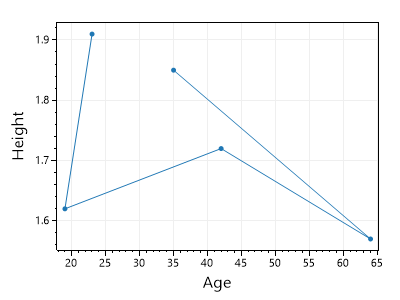

In [ ]:
// get data as double arrays
double[] ages = Enumerable.Range(0, (int)df.Rows.Count).Select(x => Convert.ToDouble(df["Age"][x])).ToArray();
double[] heights = Enumerable.Range(0, (int)df.Rows.Count).Select(x => Convert.ToDouble(df["Height"][x])).ToArray();

// create and display a plot
var plt = new ScottPlot.Plot(400, 300);
plt.AddScatter(ages, heights);
plt.XLabel("Age");
plt.YLabel("Height");
plt